<a href="https://colab.research.google.com/github/otoperalias/Coyuntura/blob/main/clases/Tema5_formato_informes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mejorando el formato de nuestros informes

Este notebook proporciona instrucciones adicionales para construir informes de calidad profesional. Vamos a ver lo siguiente:
1. Dividir una figura en múltiples ```axes``` usando la función ```subplot2grid()```.
2. Insertar nuevos ```axes``` en una figura.
3. Insertar imágenes en las figuras.
4. Ajustar el tamaño de página a A4
5. Usar puntos para decimales.
6. Generar informes en PDF y en HTML.

### 1. Dividir una figura en múltiples ```axes``` usando la función ```subplot2grid()```.

Supongamos que queremos crear una figura tamaño A4 con el siguiente formato:

<img src="https://github.com/otoperalias/Coyuntura/blob/main/clases/images/Ej1_subplot2grid.png?raw=true" alt="drawing" width="250"/>

Para ello, empleamos el siguiente código:

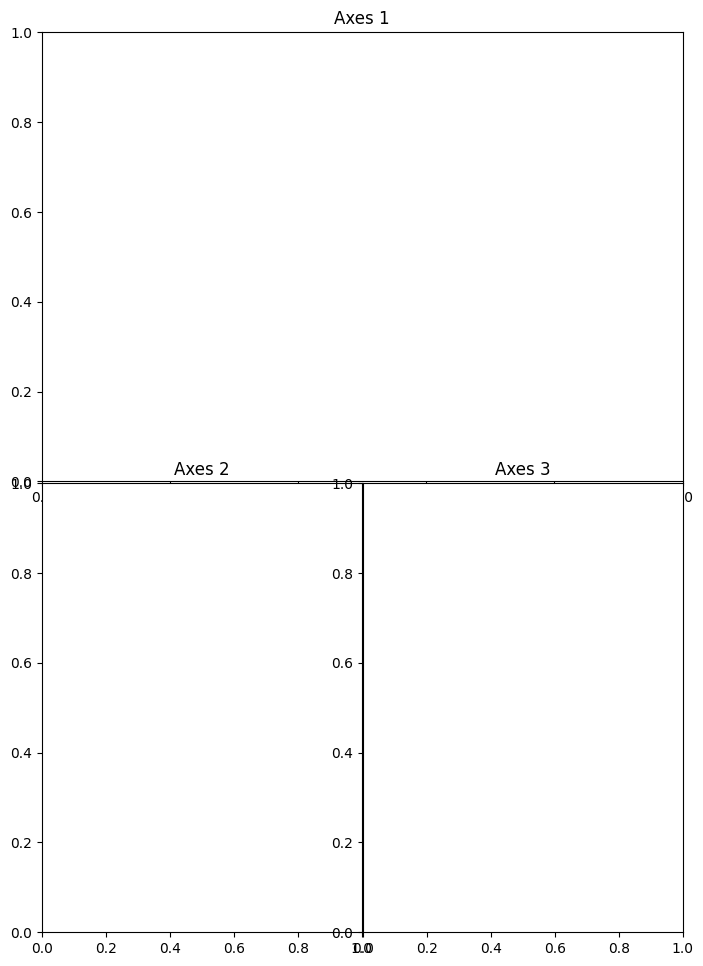

In [2]:
import matplotlib.pyplot as plt

gridsize=(100,100) # Así se divide la figura en 100 filas x 100 columnas.
fig_size=(8.27,11.69) # Una hoja A4 tiene ese tamaño, en pulgadas.

fig=plt.figure(figsize=fig_size,dpi=100)
  # Axes1 empieza en la coordenada (0,0), ocupa todo el ancho (100 columnas) y la mitad del alto (50 col.)
ax1=plt.subplot2grid(gridsize,(0,0),colspan=100,rowspan=50)
  # Axes2 empieza en la coordenada (50,0) [fila=50, columna=0], ocupa todo 1/2 ancho (50 columnas) y la mitad del alto (50 col.)
ax2=plt.subplot2grid(gridsize,(50,0),colspan=50,rowspan=50)
  # Axes3 empieza en la coordenada (50,50) [fila=50, columna=50], ocupa todo 1/2 ancho (50 columnas) y la mitad del alto (50 col.)
ax3=plt.subplot2grid(gridsize,(50,50),colspan=50,rowspan=50) # Axes3 ...
ax1.set_title("Axes 1")
ax2.set_title("Axes 2")
ax3.set_title("Axes 3")
plt.show()

Para que no se solapen los gráficos con los títulos podemos retocar ligeramente las coordenadas de origen de cada ```axes``` y las filas/columnas que ocupan.

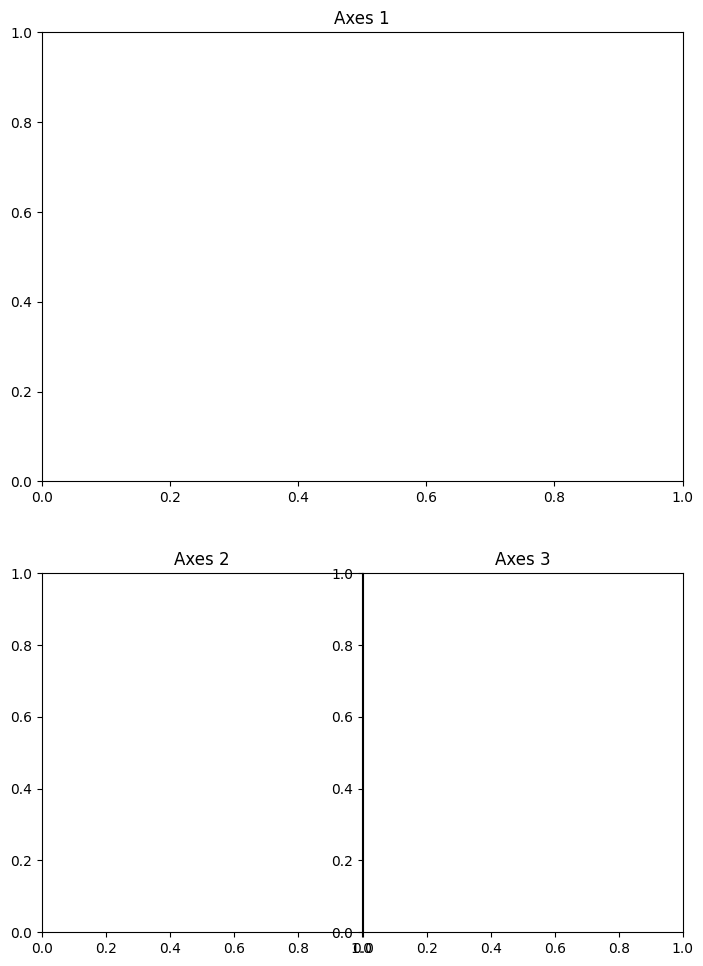

In [4]:
gridsize=(100,100) # Así se divide la figura en 100 filas x 100 columnas.
fig_size=(8.27,11.69) # Una hoja A4 tiene ese tamaño, en pulgadas.

fig=plt.figure(figsize=fig_size,dpi=100)
ax1=plt.subplot2grid(gridsize,(0,0),colspan=100,rowspan=50)
ax2=plt.subplot2grid(gridsize,(60,0),colspan=50,rowspan=40)
ax3=plt.subplot2grid(gridsize,(60,50),colspan=50,rowspan=40)
ax1.set_title("Axes 1")
ax2.set_title("Axes 2")
ax3.set_title("Axes 3")
plt.show()

Supongamos ahora que queremos crear un formato de página así:

<img src="https://github.com/otoperalias/Coyuntura/blob/main/clases/images/Ej2_subplot2grid.png?raw=true" alt="drawing" width="250"/>

Para ello, empleamos el siguiente código (dejando margen para los títulos):

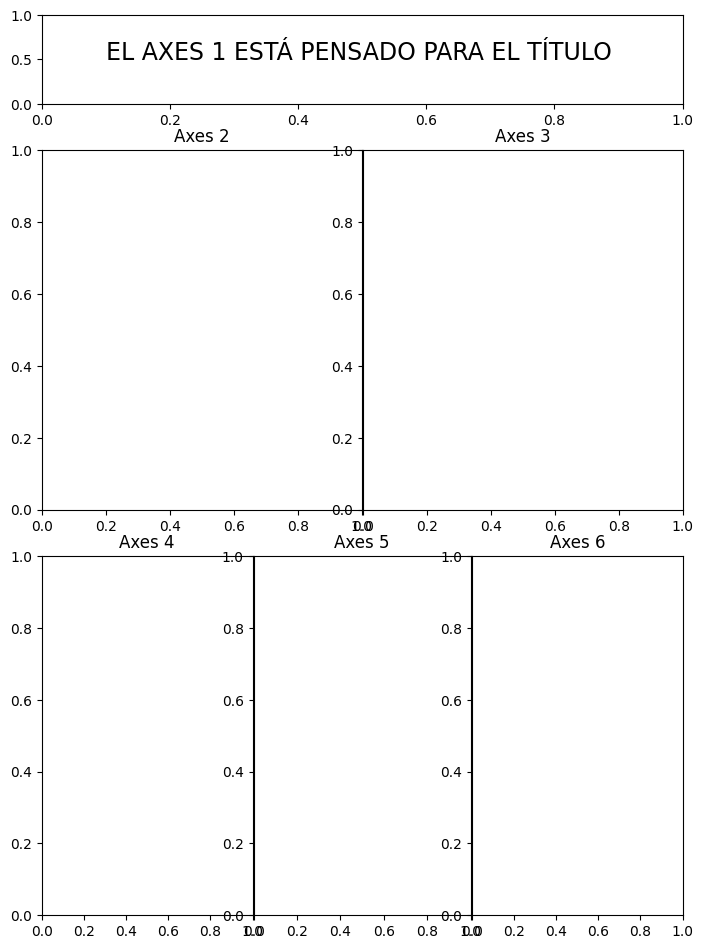

In [5]:
gridsize=(100,100) # Así se divide la figura en 100 filas x 100 columnas.
fig_size=(8.27,11.69) # Una hoja A4 tiene ese tamaño, en pulgadas.

fig=plt.figure(figsize=fig_size,dpi=100)
ax1=plt.subplot2grid(gridsize,(0,0),colspan=100,rowspan=10) # Esto está pensado para poner el título del informe
ax2=plt.subplot2grid(gridsize,(15,0),colspan=50,rowspan=40)
ax3=plt.subplot2grid(gridsize,(15,50),colspan=50,rowspan=40)
ax4=plt.subplot2grid(gridsize,(60,0),colspan=33,rowspan=40)
ax5=plt.subplot2grid(gridsize,(60,33),colspan=34,rowspan=40)
ax6=plt.subplot2grid(gridsize,(60,67),colspan=33,rowspan=40)
ax1.text(0.1,0.5, "EL AXES 1 ESTÁ PENSADO PARA EL TÍTULO", size=17)
ax2.set_title("Axes 2")
ax3.set_title("Axes 3")
ax4.set_title("Axes 4")
ax5.set_title("Axes 5")
ax6.set_title("Axes 6")
plt.show()

### 2. Insertar nuevos ```axes``` en una figura.

A veces puede ser conveniente insertar un nuevo ```axes``` en una figura, solapándose parcialmente sobre otro

In [ ]:
fig, ax=plt.subplots()
# Añadimos un nuevo axes en la esquina superior derecha
ax2 =fig.add_axes([0.6,.6,.25,.25])  # ([xmin,ymin,dx,dy]), donde dx y dy indican la anchura y altura como % de la figura, en tantos por 1.
plt.show()

### 3. Insertar imágenes en una figura.

También es interesante saber cómo insertar imágenes en una figura. Por ejemplo, vamos a insertar la bandera de Andalucía en una figura:

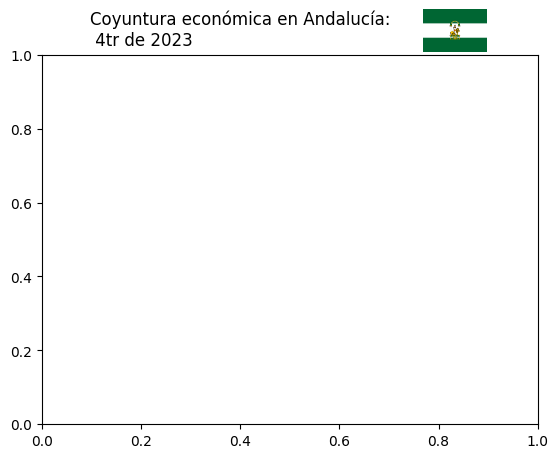

In [ ]:
# Primero hay que subir el archivo de la bandera (https://github.com/otoperalias/Coyuntura/blob/main/clases/images/Bandera_de_Andalucia.png) a Colab.

fig, ax=plt.subplots()
fig.text(0.2,0.9,"Coyuntura económica en Andalucía:\n 4tr de 2023",horizontalalignment="left", size=12)
# Añadimos un nuevo axes en la esquina superior derecha para insertar la bandera
bandera = plt.imread("Bandera_de_Andalucia.png")
newax = fig.add_axes([0.72,0.88,.10,.10])
newax.imshow(bandera)
newax.axis('off')

plt.show()

### 4. Ajustar el tamaño de página a A4.

El tamaño estándar de los informes es el A4. Por tanto, es útil saber cómo ajustar el tamaño de las figuras a dicho formato de página. Para ello, hay que indicar el tamaño en pulgadas (*inches*) a la hora de crear la figura:

```
fig,ax= plt.subplots(figsize=(8.27,11.69))
```

Si abrimos el archivo PDF creado y clicamos en *Propiedades del documento*, veremos que el tamaño es 210 x 297 mm (equivalente a la medida anterior en pulgadas).

Los gráficos que se muestran en Spyder o Colab no muestran los márgenes, pero el que guardamos con la función ```plt.savefig()``` sí contiene márgenes. Si consideramos que los márgenes son muy grandes, podemos usar la función ```plt.tight_layout()``` antes de guardar el gráfico. El argumento ```pad``` sirve para ajustar el margen.

### 5. Usar puntos para decimales

En español y otras lenguas de Europa continental los decimales se denotan con comas, mientras en inglés es con puntos. Para que en nuestro informe los decimales aparezcan con comas, debemos indicar lo siguiente cuando trabajemos desde nuestro ordenador (pero tened en cuenta que en Google Colab no funciona este ajuste):
```
# Locale settings
import locale
# Set to Spain locale to get comma decimal separater
locale.setlocale(locale.LC_ALL, "es_ES")
# Tell matplotlib to use the locale we set above
plt.rcParams['axes.formatter.use_locale'] = True
```

### 6. Generar informes en HTML.

Los dos formatos más comunes para generar informes hoy en día son PDF y HTML.

#### 6.1 PDF  
Generar informes en PDF es sencillo, por ejemplo, a través de ```matplotlib```, como hemos visto en notebooks anteriores.

Para automatizar al máximo el proceso, también es conveniente unir los PDFs individuales generados usando unas de las librerías disponibles, como por ejemplo PyPDF2. El siguiente bloque de código muestra como unir dos archivos PDFs:
```
!pip install PyPDF2
import PyPDF2  # Si no lo importa, reiniciar el entorno de ejecución
mergeFile = PyPDF2.PdfMerger ()
mergeFile.append(PyPDF2.PdfReader ('file1.pdf', 'rb'))
mergeFile.append(PyPDF2.PdfReader ('file2.pdf', 'rb'))
mergeFile.write("NewMergedFile.pdf")
```


#### 6.2 HTML    
A través de Jupyter notebooks, es sencillo generar informes en HTML, facilitando así su distribución a través de páginas web. Para ello, hay que introducir el siguiente código:
##### 6.2.1 **Si estamos usando Jupyter desde nuestro PC:**
  ```
  # Última celda del notebook
# 1. Guardar la última versión que acaba de ejecutarse
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))
# 2. Producir el informe en versión HTML
import os
os.chdir(r"C:\Users\danie\CyP") # aquí indicamos la ubicación del notebook
os.system("jupyter nbconvert Tema2_Pandemia_COVID19_Europa.ipynb --to html --no-input --no-prompt ")
```
El informe en HTML se guardará en la misma ubicación que el notebook.  
Si #1 anterior da error, probad esto:
```
!pip install ipylab
from ipylab import JupyterFrontEnd
app = JupyterFrontEnd()
app.commands.execute('docmanager:save')
```

##### 6.2.2 **Si estamos usando Google Colab es algo más tedioso.** Viene explicado con detalle [aquí](https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858). Al final, en lugar de escribir:
  ```
  %%shell
jupyter nbconvert --to html /your_path/NOTEBOOKFILE.ipynb
```
debéis escribir:
```
%%shell
jupyter nbconvert --to html --no-input --no-prompt /your_path/NOTEBOOKFILE.ipynb
```
para que no os salgan las celdas con código.  
Obviamente, en /your_path/NOTEBOOKFILE.ipynb debéis poner lo que tenéis en el portapapeles al clicar en Copiar ruta. En informe se guardará en la pestaña de archivos de Google Colab.